In [10]:
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import os
import random
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

from skimage.transform import resize


In [11]:
files = os.listdir('dogs-vs-cats/train')
labels = [each.split(".")[0] for each in files]
id = [each.split(".")[1] for each in files]

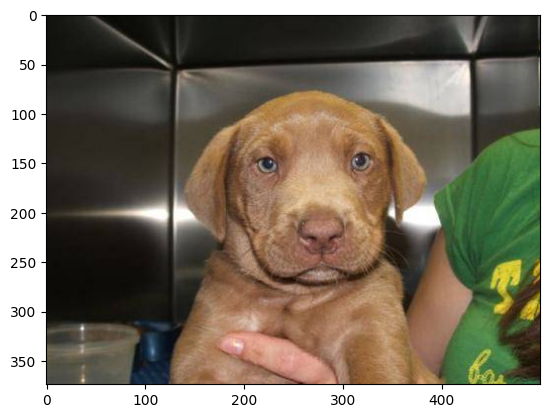

In [12]:
sample = random.choice(files)
image = mpimg.imread('dogs-vs-cats/train/' + sample)
plt.imshow(image)
plt.show()

In [13]:

images = []
for each in tqdm(files):
    image = mpimg.imread('dogs-vs-cats/train/' + each)
    images.append(resize(image, (32,32,3)))



  0%|          | 0/25000 [00:00<?, ?it/s]

In [14]:
images_1 = np.array(images)

In [15]:
print('image: ' + str(type(images)) + str(len(images)))
print('image_1: ' + str(type(images_1)) + str(images_1.shape))


image: <class 'list'>25000
image_1: <class 'numpy.ndarray'>(25000, 32, 32, 3)


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)


print(f'What was encoded: {encoder.classes_}')
print(f'From: {labels[:3]}')
print(f'To: {encoded_labels[:3]}')


What was encoded: ['cat' 'dog']
From: ['dog', 'cat', 'dog']
To: [1 0 1]


1.Split Label(using file name)
2.Adjust img size (32,32)
3.Encoding Lable (0,1)


['dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog']
[1 0 1 0 1 1 1 0 1 1]


<Sample 1~5>


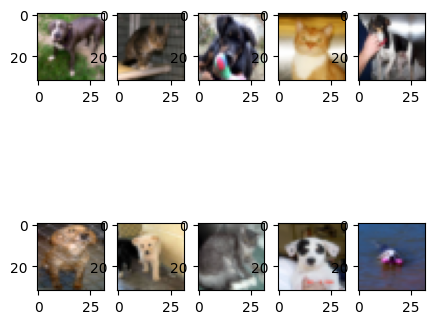

In [17]:
from keras.preprocessing.image import array_to_img

sample_image_num = 10

sample_image = [array_to_img(each) for each in images_1[:sample_image_num]]

plt.figure(figsize=(5,5))
for idx , each in enumerate(sample_image):
    plt.subplot(2,5,idx+1)
    plt.imshow(sample_image[idx])

print('1.Split Label(using file name)')
print('2.Adjust img size (32,32)')
print('3.Encoding Lable (0,1)')
print('\n')

print(labels[:sample_image_num])
print(encoded_labels[:sample_image_num])
print('\n')

print("<Sample 1~5>")



### ml

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_1,
                                                    encoded_labels,
                                                    test_size= 0.2,
                                                    random_state= 13,
                                                    stratify=encoded_labels)

In [36]:
print('Train:',X_train.shape, 'Test:',X_test.shape)

Train: (20000, 32, 32, 3) Test: (5000, 32, 32, 3)


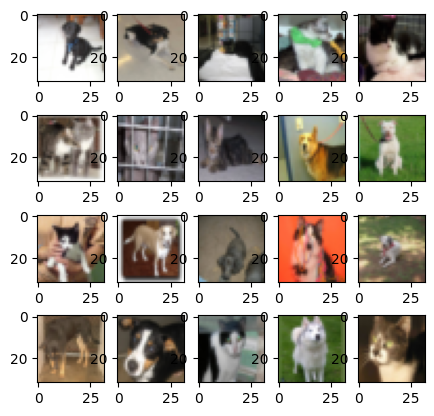

In [20]:
sample_size = 20
row = int(sample_size/5)
col = int(sample_size/row)

samples = random.choices(population=range(0,len(X_train)), k=sample_size)
plt.figure(figsize=(5,5))
for idx , each in enumerate(samples):
    plt.subplot(row,col, idx+1)
    plt.imshow(X_train[each])

In [38]:
from tensorflow.keras import layers,models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3) ,activation='relu',
                  input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3),activation='relu', padding= 'same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3) ,activation='relu', padding= 'same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation= 'softmax')
])


/home/sunnypc/dev/ML/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,770 (1.35 MB)

 Trainable params: 352,770 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [41]:
type(X_train)

numpy.ndarray

In [49]:
epochs_param = [10,20,30]
result = []
for each in epochs_param:
    hist = model.fit(X_train,y_train,
                    epochs = each, verbose=1,
                    validation_data = (X_test ,y_test))
    result.append(hist)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8063 - loss: 0.4192 - val_accuracy: 0.8074 - val_loss: 0.4115
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8109 - loss: 0.4117 - val_accuracy: 0.8184 - val_loss: 0.4050
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8126 - loss: 0.4073 - val_accuracy: 0.8062 - val_loss: 0.4140
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8115 - loss: 0.3954 - val_accuracy: 0.8214 - val_loss: 0.3970
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8229 - loss: 0.3904 - val_accuracy: 0.8158 - val_loss: 0.3958
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8196 - loss: 0.3862 - val_accuracy: 0.8026 - val_loss: 0.4176
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8263 - loss: 0.3797 - val_accuracy: 0.8172 - val_loss: 0.3970
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.3725 - val_accuracy: 0.

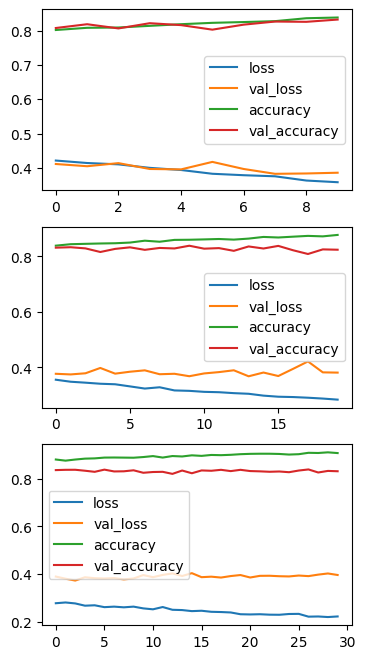

In [65]:
target_feature = ['loss', 'val_loss','accuracy', 'val_accuracy']
plt.figure(figsize=(4,8))

for idx , each in enumerate(result):
    plt.subplot(3,1,idx+1)
    for target in target_feature:

        plt.plot(each.history[target], label=target)

    plt.legend()




# for idx , each in enumerate(samples):
#     plt.subplot(row,col, idx+1)
#     plt.imshow(X_train[each])

In [ ]:
.venv/